### Name: Mohammad Parham Bateni
### Student Number: 99105294

In this notebook we want to use monte carlo methods to calculate the $\pi$ number.
For this reason we create many points within a square with side length 2 and we count the points which lie within a circle with radius 1 and its center located at the intersection of square's diameters.
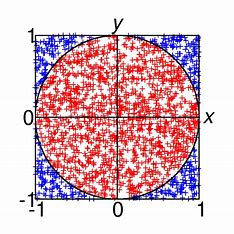

In [1]:
import numpy as np
from matplotlib import pyplot as plt,patches
from matplotlib.pyplot import close,ioff,ion

# A)

In [36]:
def estimate_pi(count_points,normal=False,std=None,illustrate=False,alpha=0.05):
    if normal:
        points=list(zip(np.random.normal(0,std,count_points),np.random.normal(0,std,count_points)))
    else:
        points=list(zip(np.random.rand(count_points)*2-1,np.random.rand(count_points)*2-1))
    count_points_in_circle=len(list(filter(lambda x:x[0]**2+x[1]**2<=1,points)))
    if illustrate:
        fig = plt.figure()
        ax = fig.add_subplot()
        circle = patches.Circle((0, 0), radius=1,color='black',fill=False)
        square= patches.Rectangle((-1,-1),width=2,height=2,color='black',fill=False)
        points_in_circle=list(filter(lambda x:x[0]**2+x[1]**2<=1,points))
        points_in_square_not_circle=list(filter(lambda x:x[0]**2+x[1]**2>1 and -1<=x[0]<=1 and -1<=x[1]<=1,points))
        points_out_of_square=list(filter(lambda x: x[0]>1 or x[0]<-1 or x[1]>1 or x[0]<-1,points))
        ax.scatter([x[0] for x in points_in_circle],[x[1] for x in points_in_circle],color='red',alpha=alpha,label='Points in Circle')
        ax.scatter([x[0] for x in points_in_square_not_circle],[x[1] for x in points_in_square_not_circle],color='green',alpha=alpha,label='Points Out of Circle but in Square')
        ax.scatter([x[0] for x in points_out_of_square],[x[1] for x in points_out_of_square],color='blue',alpha=alpha,label='Points out of Square')
        ax.add_patch(circle)
        ax.add_patch(square)
        ax.axis('equal')
        ax.set_title(f'n={count_points}, π ≈ {count_points_in_circle/count_points*4}')
        leg=plt.legend()
        for lh in leg.legendHandles: 
            lh.set_alpha(1)
        plt.show()
    return count_points_in_circle/count_points*4

So we run the simulation 100 times with 30000 points and we report the best estimation between these 100 runs and we illustrate the last simulation.

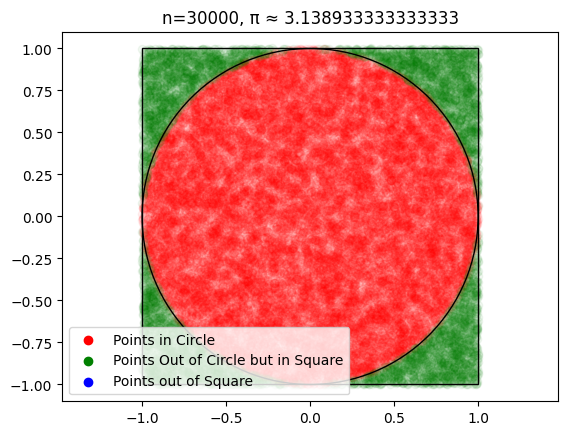

Pi number is 3.141592653589793
Best estimation of pi is 3.1416


In [51]:
count_points_A=30000
best_estimation=None
best_difference=float('inf')
for i in range(100):
    s_pi=estimate_pi(count_points_A,illustrate=i==99,alpha=0.05)
    if np.abs(s_pi-np.pi)<best_difference:
        best_estimation=s_pi
        best_difference=np.abs(s_pi-np.pi)
print(f'Pi number is {np.pi}')
print(f'Best estimation of pi is {best_estimation}')

# B)
Now we draw the graph of count of points vs estimated pi value to see the convergency of it.

In [10]:
def plot_pi_estimations(count_points,pi_estimations):
    plt.plot(count_points,pi_estimations,label='Pi Estimation')
    plt.xlabel("Count Points Sampled")
    plt.ylabel("Pi Estimation")
    plt.title("Pi Estimation vs Count Points Sampled")
    plt.xlim(count_points[0],count_points[-1])
    plt.hlines(np.pi,count_points[0],count_points[-1],color='red',label='Pi Real Value')
    plt.legend()
    plt.show()

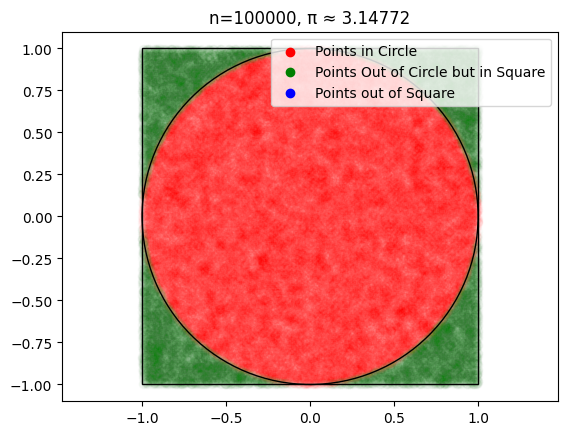

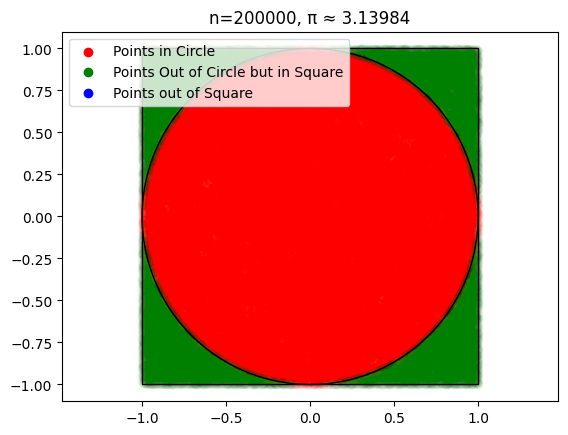

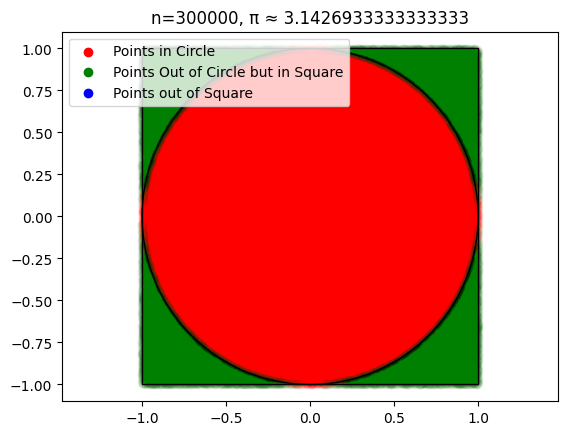

In [43]:
count_points_B=np.arange(1000,301000,1000)
pi_estimations_B=np.array([estimate_pi(c,illustrate=c%100000==0,alpha=0.01) for c in count_points_B])

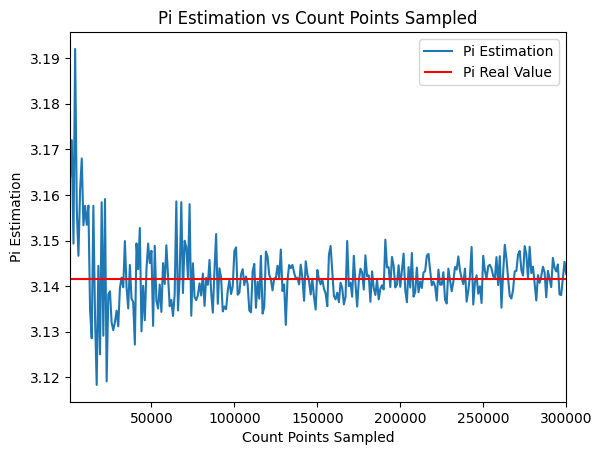

In [44]:
plot_pi_estimations(count_points_B,pi_estimations_B)

As it can be seen from the provided figure the estimation of $\pi$ is converging to its real value as the count of points sampled increases

# C)
Now we run the simulation two times with the count of points equal to one in the part A and we draw the graph of pi estimation.

In [59]:
count_points_C1=np.arange(1,count_points_A,100)
count_points_C2=np.arange(1,count_points_A,100)
pi_estimations_C1=np.array([estimate_pi(c) for c in count_points_C1])
pi_estimations_C2=np.array([estimate_pi(c) for c in count_points_C2])

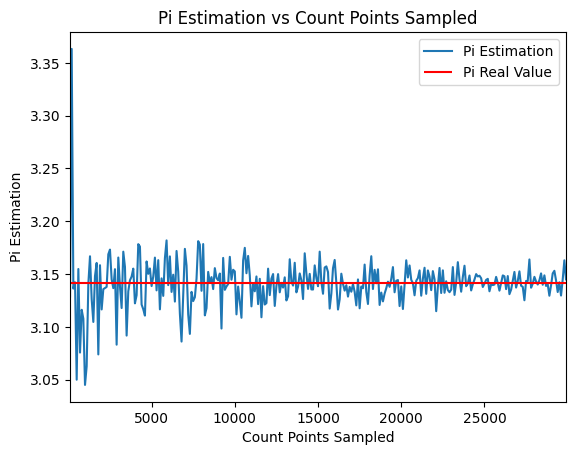

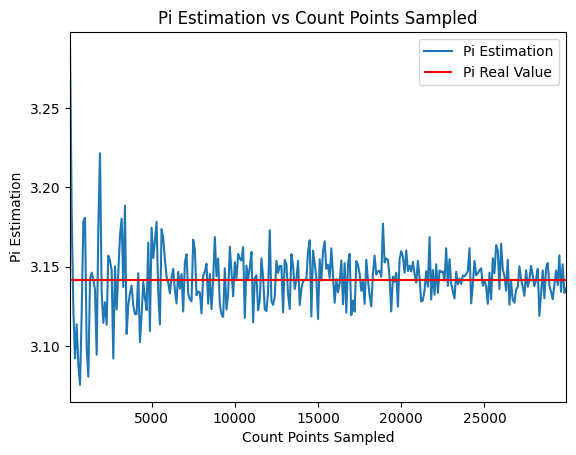

In [60]:
plot_pi_estimations(count_points_C1[1:],pi_estimations_C1[1:])
plot_pi_estimations(count_points_C2[1:],pi_estimations_C2[1:])

Again in this part the Pi estimation is converging to $\pi$'s real value. In part A we ran the simulation 10 times and we selected the best estimation of $\pi$. In fact the $\pi$ estimation in this part should be near the value calculated in the part A.

In [61]:
print(f'Pi estimation in this part values: {pi_estimations_C1[-1]}, {pi_estimations_C2[-1]}')
print(f'Pi estimation in part A: {best_estimation}')

Pi estimation in this part values: 3.1449115414200195, 3.1363499548510085
Pi estimation in part A: 3.1416


# D)
In the previous parts we sampled the points from the 2D uniform distribution. Interestingly we can test monte carlo approach with other distributions. Now we will test it with 2D normal distribution. After testing multiple standard deviations we found out that standard deviation of 0.57 for normal distribution approximates the $\pi$ value the best.
<br>
Notice that it is clear that uniform distribution is the most suitable distribution for this problem however this doesn't mean we can't use other distributions. Here by using normal distribution and with appropriate standard deviation parameter we were able to approximate $\pi$ almost well. 

In [80]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

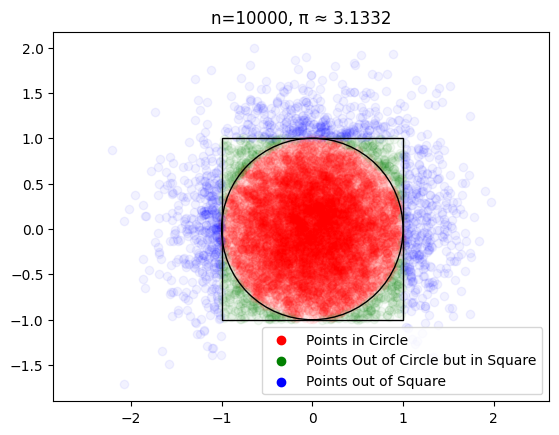

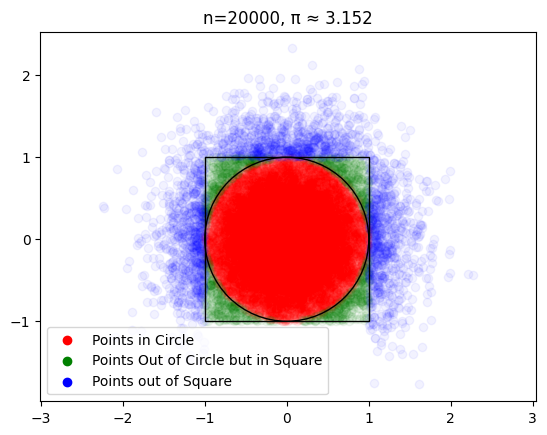

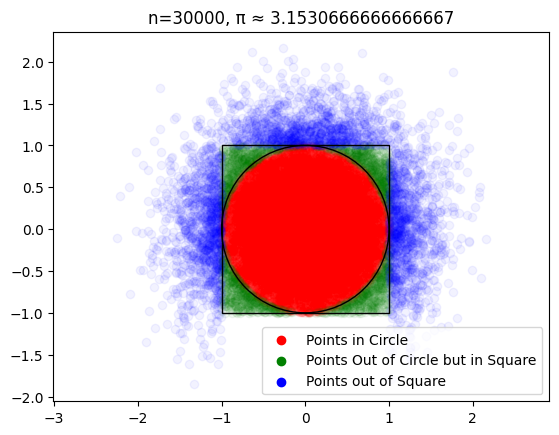

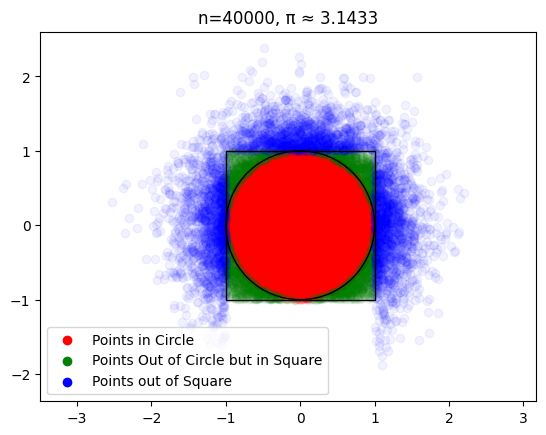

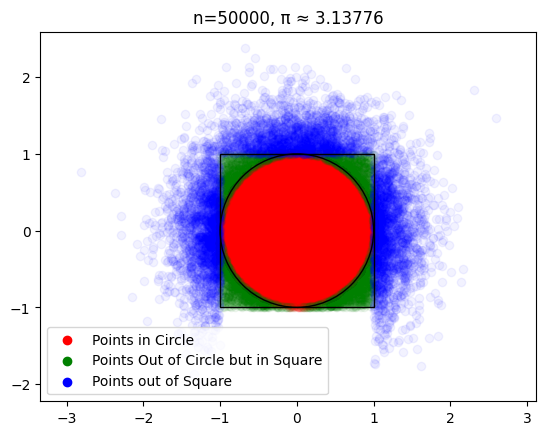

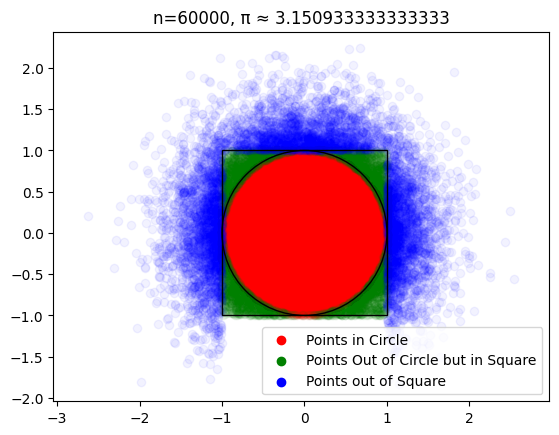

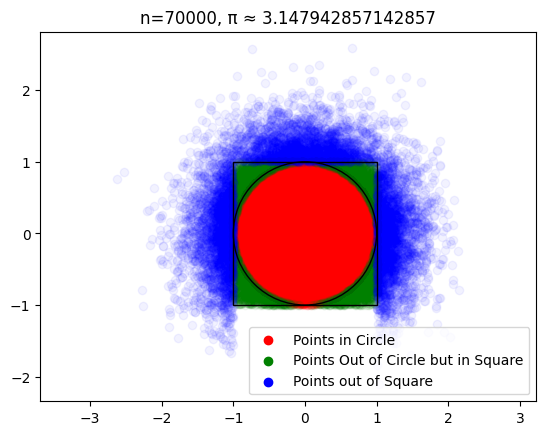

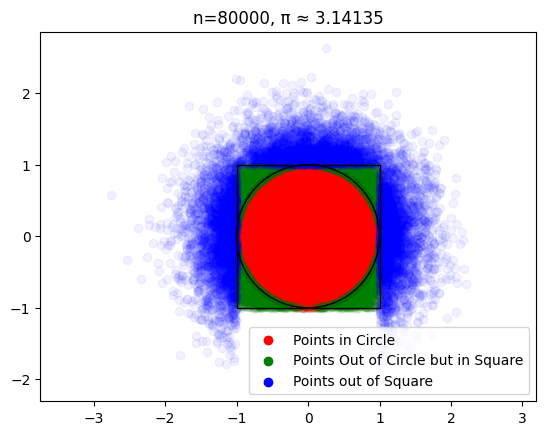

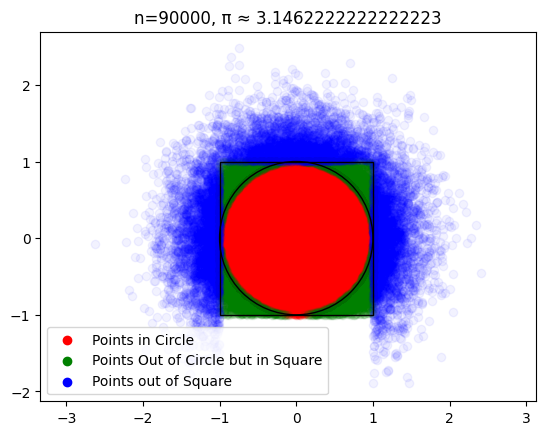

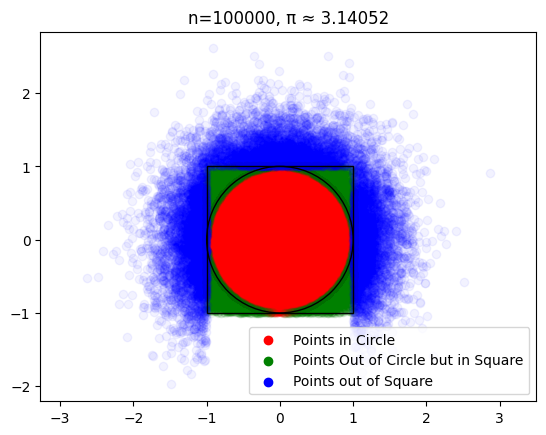

In [81]:
count_points_D=np.arange(0,100001,100)
pi_estimations_D=np.array([estimate_pi(c,normal=True,std=0.569,illustrate=c%10000==0) for c in count_points_D[1:]])

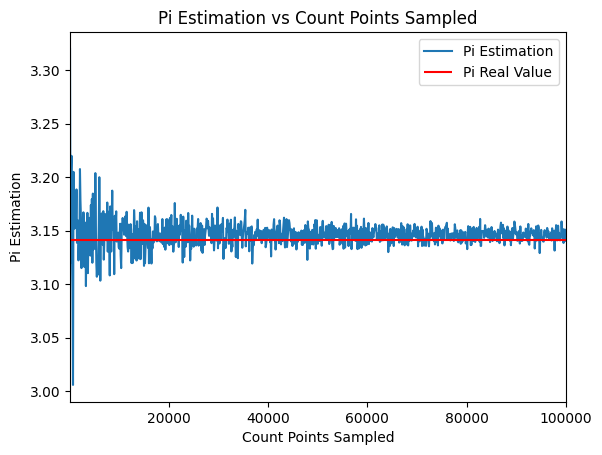

Pi number is:3.141592653589793
Pi estimation is: 3.14052


In [82]:
plot_pi_estimations(count_points_D[1:],pi_estimations_D)
print(f'Pi number is:{np.pi}')
print(f'Pi estimation is: {pi_estimations_D[-1]}')

# E)
In this last part we try to use the proposed monte carlo method to estimate the area of an oval.
<br>
oval's equation: 
$$5x^2-6xy+5y^2-32=0$$
Same as the previous parts we sample many points from a 2D uniform distribution. We consider a square with side length 8 this time then the oval lies in this square so we can use the monte carlo approach to estimate the area of the oval.


[]

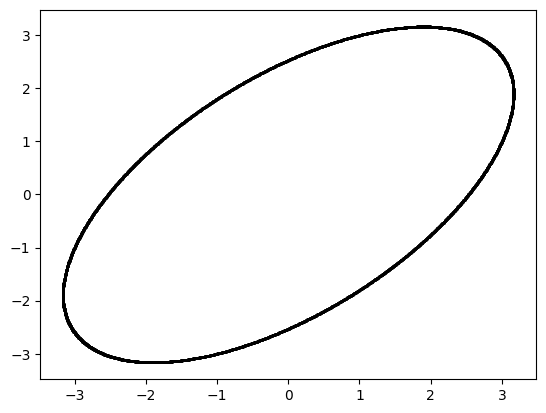

In [115]:
def oval_equation(x,y):
    return 5*x**2-6*x*y+5*y**2-32
def draw_oval(equation,xlim,ylim,ax,draw_square=False):
    x_range=np.arange(xlim[0],xlim[1],0.005)
    y_range=np.arange(ylim[0],ylim[1],0.005)
    x_points=[]
    y_points=[]
    for x in x_range:
        for y in y_range:
            if np.abs(equation(x,y))<0.1:
                x_points.append(x)
                y_points.append(y)
    ax.scatter(x_points,y_points,s=1,color='black')
    if draw_square:
        square=patches.Rectangle((-4,-4),8,8,color='black',fill=False)
        ax.add_patch(square) 
oval_x_range=[-4,4]
oval_y_range=[-4,4]
fig,ax=plt.subplots()
draw_oval(oval_equation,oval_x_range,oval_y_range,ax)
plt.plot()

As it can be seen from the above figure the oval's x and y are between -4 and 4 so we can perform the simulation with a square of side length of 8 and its center located on (0,0).

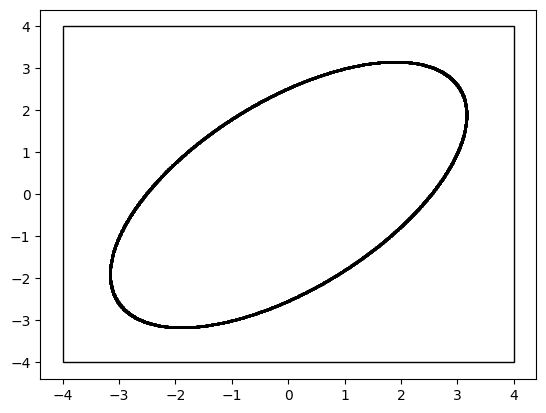

In [116]:
fig,ax=plt.subplots()
draw_oval(oval_equation,oval_x_range,oval_y_range,ax,draw_square=True)

Now we perform sampling and we plot the area of oval vs count points plot to find the best count of points that makes the
area converge.

In [127]:
def estimate_oval_area(count_points,oval_equation,oval_x_range,oval_y_range,illustrate=False):
    points=list(zip(np.random.rand(count_points)*8-4,np.random.rand(count_points)*8-4))
    points_in_oval=list(filter(lambda x: oval_equation(x[0],x[1])<=0,points))
    points_in_square_not_oval=list(filter(lambda x:oval_equation(x[0],x[1])>0 and -4<=x[0]<=4 and -4<=x[1]<=4,points))
    if illustrate:
        fig,ax=plt.subplots()
        draw_oval(oval_equation,oval_x_range,oval_y_range,ax,draw_square=True)
        ax.scatter([x[0] for x in points_in_oval],[x[1] for x in points_in_oval],color='red',alpha=0.01,label='Points in Oval')
        ax.scatter([x[0] for x in points_in_square_not_oval],[x[1] for x in points_in_square_not_oval],color='green',alpha=0.01,label='Points out of Oval but in Square')
        ax.axis('equal')
        ax.set_title(f'n={count_points}, Oval\'s Area ≈ {len(points_in_oval)/count_points*64}')
        leg=plt.legend()
        for lh in leg.legendHandles: 
            lh.set_alpha(1)
        plt.show()
    return len(points_in_oval)/count_points*64

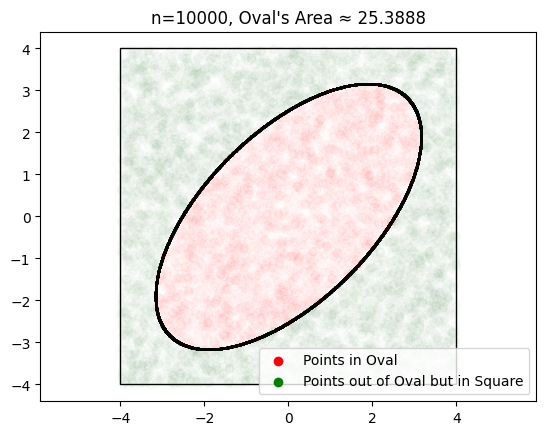

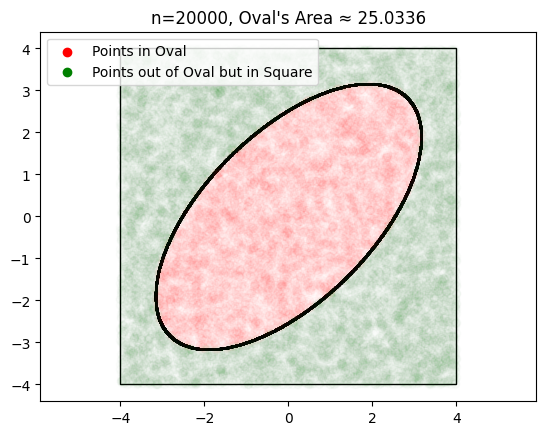

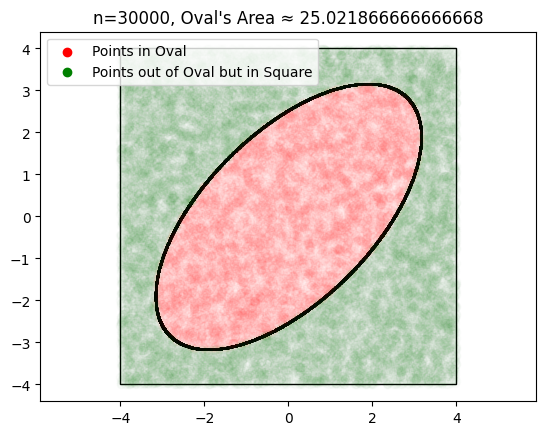

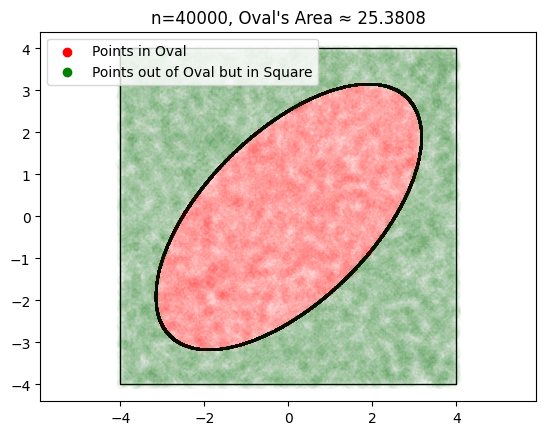

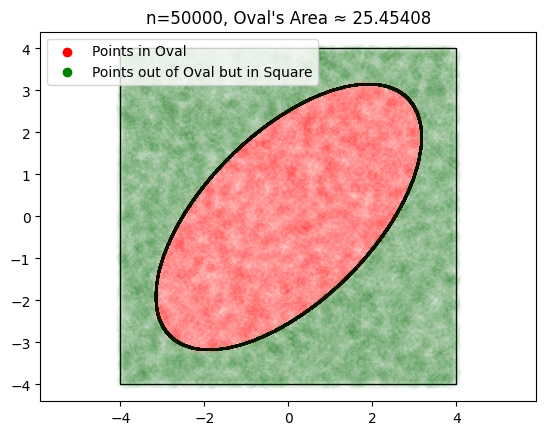

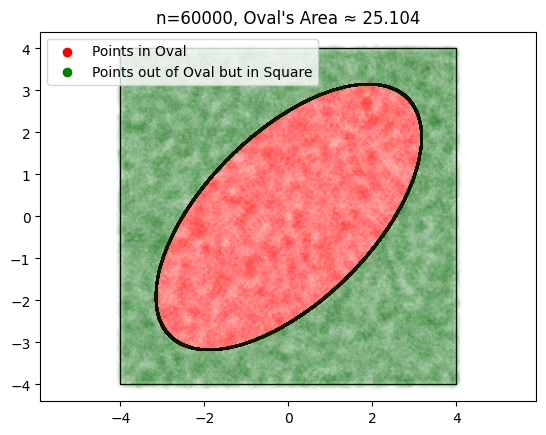

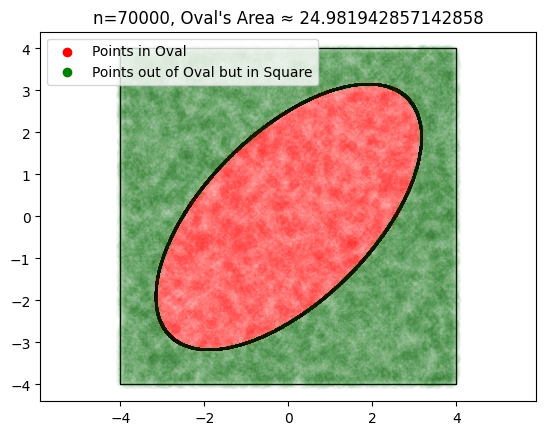

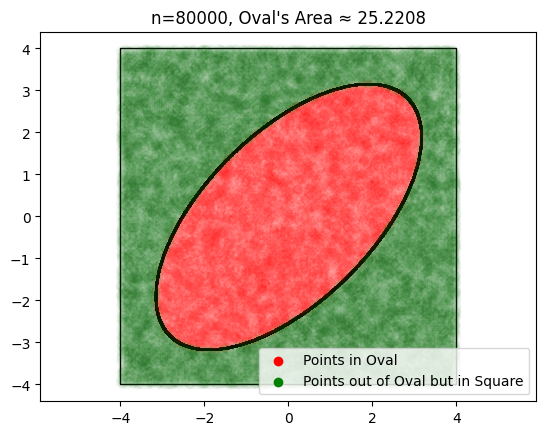

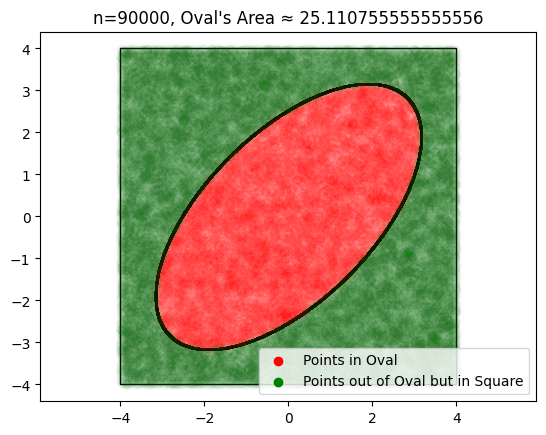

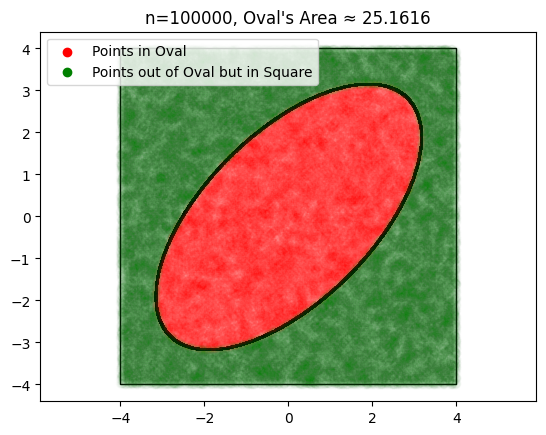

In [135]:
count_points=np.arange(0,100001,1000)
area_estimations=np.array([estimate_oval_area(c,oval_equation,oval_x_range,oval_y_range,illustrate=c%10000==0) for c in count_points[1:]])

In [142]:
def plot_area_estimations(count_points,area_estimations,oval_real_area):
    plt.plot(count_points,area_estimations,label='Area Estimation')
    plt.xlabel("Count Points Sampled")
    plt.ylabel("Area Estimation")
    plt.title("Area Estimation vs Count Points Sampled")
    plt.xlim(count_points[0],count_points[-1])
    plt.hlines(oval_real_area,count_points[0],count_points[-1],color='red',label='Oval\'s Real Area')
    plt.legend()
    plt.show()

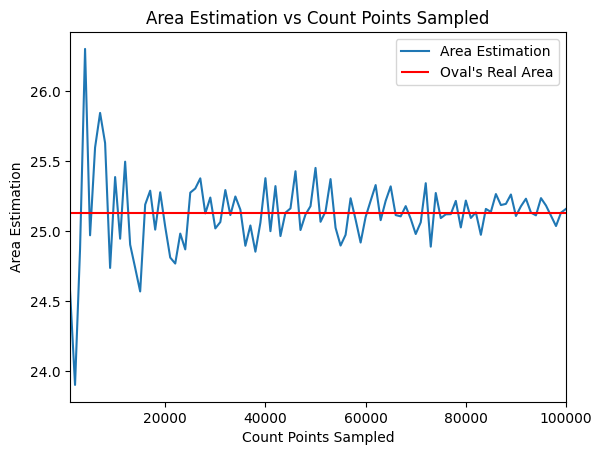

Oval's Real Area is: 25.1327
Oval's Area estimation is: 25.1616


In [143]:
oval_real_area=25.1327
plot_area_estimations(count_points[1:],area_estimations,oval_real_area)
print(f'Oval\'s Real Area is: {oval_real_area}')
print(f'Oval\'s Area estimation is: {area_estimations[-1]}')

Simply the more points are sampled the more the above figure will converge. Since for more than 100000 points the process of sampling could be inefficient in time and storage we report 100000 to be the required number of points to estimate the area of the oval :)
<br>
Also for the purpose of validation, we found the oval's real area by using [wolfram alpha]("https://www.wolframalpha.com/input?i=Area+5x%5E2-6xy%2B5y%5E2-32%3D0").
Since the estimated area and the real area are close to eachother we can make sure that the simulation is done correctly. :)